In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import imblearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv("E:\Machine learning\Project\Instagram_Analytics.csv")

In [4]:
df.shape

(29999, 15)

In [ ]:
df.head()
df.isnull().sum()

In [26]:
df.drop(['post_id','upload_date','media_type','caption_length','traffic_source','content_category'], axis=1, inplace=True)
df.columns

Index(['likes', 'comments', 'shares', 'saves', 'reach', 'impressions',
       'hashtags_count', 'followers_gained', 'engagement_rate'],
      dtype='object')

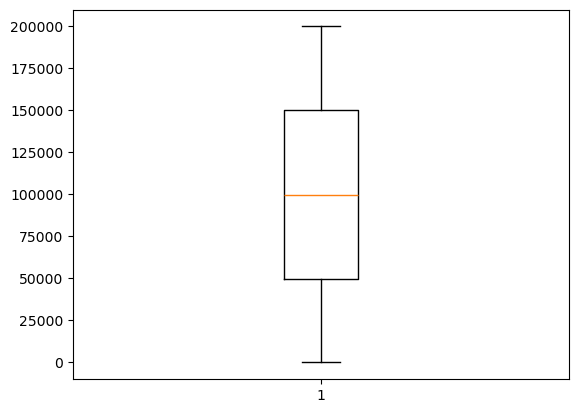

In [8]:
plt.boxplot(df['likes'])
plt.show()

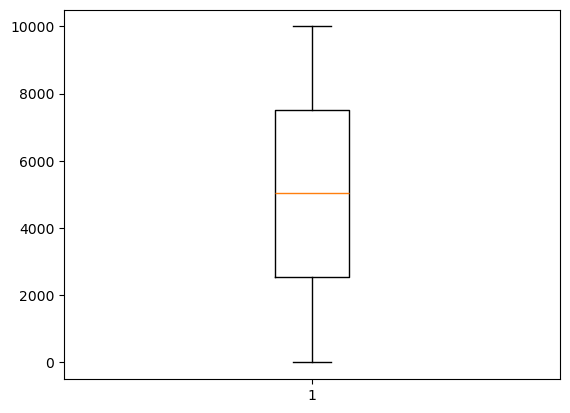

In [9]:
plt.boxplot(df['comments'])
plt.show()

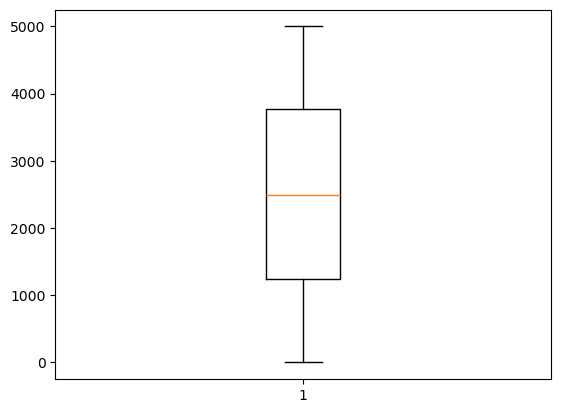

In [10]:
plt.boxplot(df['shares'])
plt.show()

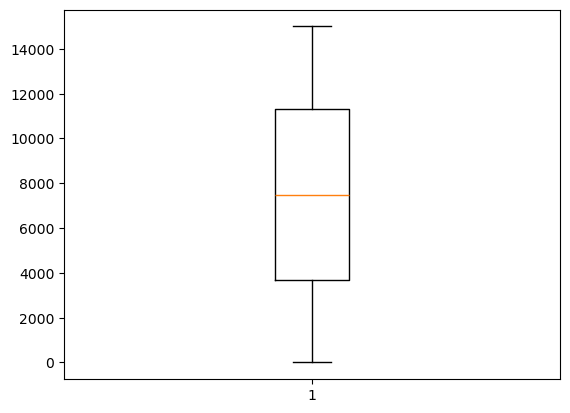

In [11]:
plt.boxplot(df['saves'])
plt.show()

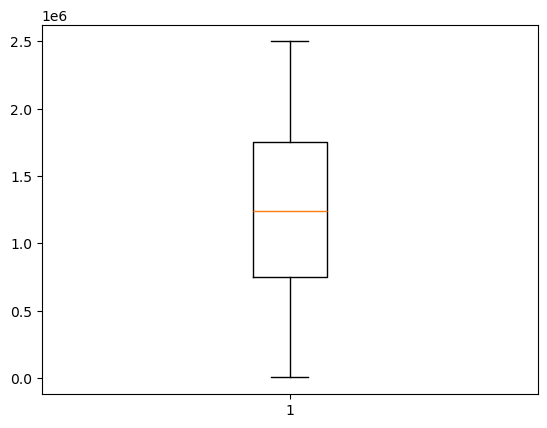

In [12]:
plt.boxplot(df['impressions'])
plt.show()

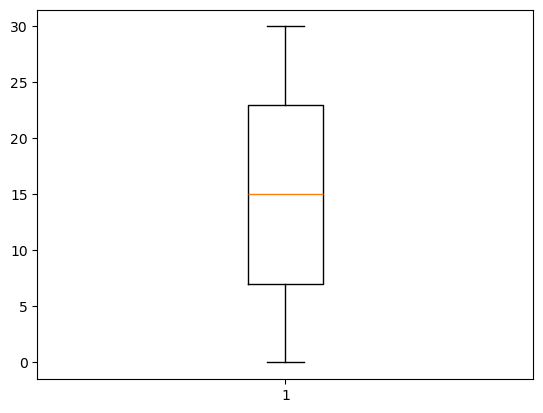

In [13]:
plt.boxplot(df['hashtags_count'])
plt.show()

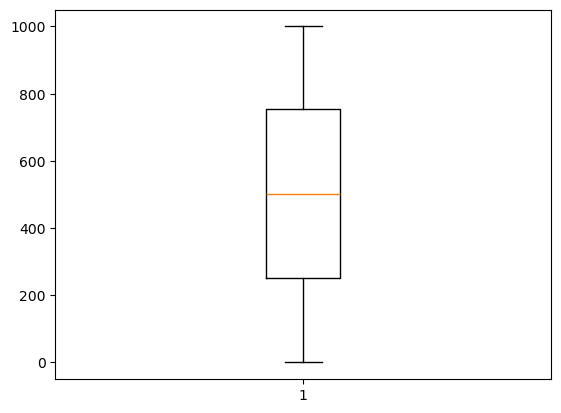

In [14]:
plt.boxplot(df['followers_gained'])
plt.show()

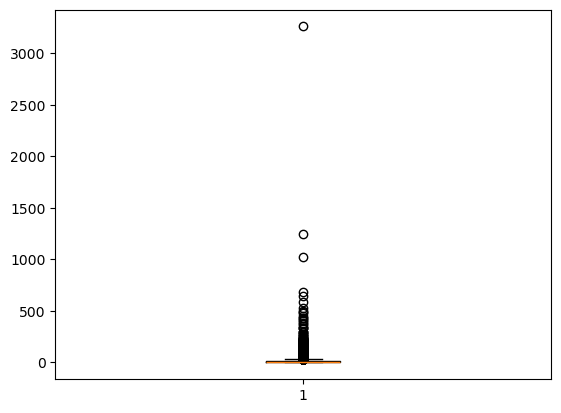

In [7]:
plt.boxplot(df['engagement_rate'])
plt.show()

In [ ]:
df['engagement_rate'].hist()

In [27]:
df['Eng_rate_zscore'] = stats.zscore(df['engagement_rate'])
outliers = df[abs(df['Eng_rate_zscore']) > 3]
outliers
df.drop(outliers.index,inplace=True)
df.drop('Eng_rate_zscore',axis=1,inplace=True)

In [10]:
x = df.drop('engagement_rate', axis=1)
y = df[['engagement_rate']]

In [11]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

In [12]:
joblib.dump(ms,'scalar.pkl')

['scalar.pkl']

In [13]:
X_train, X_test, y_train,y_test = train_test_split(x,y,
                                                  test_size = 0.2, random_state=42)

In [14]:
'''LinearRegression Model'''
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = LR_model.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.6179660212252356
5.076724414575544
67.29973086439064


In [91]:
joblib.dump(LR_model,'LinearRegression_Model.pkl')

['LinearRegression_Model.pkl']

In [15]:
'''Ridge Model'''
Ridge_model = Ridge()
gscv1 = GridSearchCV(Ridge_model,{'alpha' : [0.01, 0.1, 1, 10, 100], 'max_iter' : [1000, 5000, 10000]},cv = 5)
gscv1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 5000, 10000]})

In [21]:
print("Best Parameters:",gscv1.best_params_)
print("Best CV Score:",gscv1.best_score_)
best_est = gscv1.best_estimator_


Best Parameters: {'alpha': 0.1, 'max_iter': 1000}
Best CV Score: 0.623140509628141


In [23]:
y_pred = best_est.predict(X_test)
print("r2_score:",r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

r2_score: 0.6179561364333181
MAE: 5.076345344736201
MSE: 67.30147218551038


In [92]:
joblib.dump(gscv1,'Ridge_Model.pkl')

['Ridge_Model.pkl']

In [26]:
'''Lasso Model'''
Lasso_model = Lasso()
gscv2 = GridSearchCV(Lasso_model,{'alpha' : [0.01, 0.1, 1, 10, 100], 'max_iter' : [1000, 5000, 10000]},cv = 5)
gscv2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 5000, 10000]})

In [27]:
print("Best Parameters:",gscv2.best_params_)
print("Best CV Score:",gscv2.best_score_)
best_est = gscv2.best_estimator_


Best Parameters: {'alpha': 0.01, 'max_iter': 1000}
Best CV Score: 0.6226369237787777


In [28]:
y_pred = best_est.predict(X_test)
print("r2_score:",r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

r2_score: 0.6167442337026674
MAE: 5.05478983217512
MSE: 67.51496295370903


In [93]:
joblib.dump(gscv2,'Lasso_Model.pkl')

['Lasso_Model.pkl']

In [29]:
'''DecisionTree Model'''
DT_model = DecisionTreeRegressor(random_state=42)
gscv3 = GridSearchCV(DT_model,{'max_depth' : [4,5,6]},cv=5,return_train_score=True)
gscv3.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6]}, return_train_score=True)

In [30]:
print("Best Parameters:",gscv3.best_params_)
print("Best CV Score:",gscv3.best_score_)
best_est = gscv3.best_estimator_


Best Parameters: {'max_depth': 6}
Best CV Score: 0.9676725489676798


In [31]:
y_pred = best_est.predict(X_test)
print("r2_score:",r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

r2_score: 0.97137084166153
MAE: 1.400931756342493
MSE: 5.0433593818863


In [90]:
joblib.dump(gscv3,'DecisionTree_Model.pkl')

['DecisionTree_Model.pkl']

In [ ]:
'''RandomForestRegressor Model'''
RFR_model = RandomForestRegressor(random_state=42)
gscv4 = GridSearchCV(RFR_model,{'n_estimators' : [10,20,30]}, cv = 5)
gscv4.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [10, 20, 30]})

In [33]:
print("Best Parameters:",gscv4.best_params_)
print("Best CV Score:",gscv4.best_score_)
best_est = gscv4.best_estimator_


Best Parameters: {'n_estimators': 30}
Best CV Score: 0.9951190745327448


In [34]:
y_pred = best_est.predict(X_test)
print("r2_score:",r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

r2_score: 0.9963138185711946
MAE: 0.319689460125448
MSE: 0.6493637525948325


In [30]:
joblib.dump(gscv4,'RandomForestRegressor_Model.pkl')

['RandomForestRegressor_Model.pkl']

In [ ]:
'''AdaBoostRegressor Model'''
AdaBoost_model = AdaBoostRegressor(random_state=42)
gscv5 = GridSearchCV(AdaBoost_model,{'n_estimators' : [10,20,30,40,50], 'learning_rate' : [0.3,0.4,0.5]}, cv = 5)
gscv5.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(random_state=42),
             param_grid={'learning_rate': [0.3, 0.4, 0.5],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [36]:
print("Best Parameters:",gscv5.best_params_)
print("Best CV Score:",gscv5.best_score_)
best_est = gscv5.best_estimator_


Best Parameters: {'learning_rate': 0.4, 'n_estimators': 50}
Best CV Score: 0.907498271755802


In [37]:
y_pred = best_est.predict(X_test)
print("r2_score:",r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

r2_score: 0.9073123304449735
MAE: 3.1677239139052196
MSE: 16.328011543649907


In [41]:
joblib.dump(gscv5,'AdaBoostRegressor_Model.pkl')

['AdaBoostRegressor_Model.pkl']

In [16]:
'''GradientBoostingRegressor Model'''
Gra_boost_model = GradientBoostingRegressor()
gscv6 = GridSearchCV(Gra_boost_model,{'n_estimators' : [10,20,30,40,50], 'learning_rate' : [0.3,0.4,0.5], 'max_depth' : [2,3,4,5]}, cv = 5)
gscv6.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.3, 0.4, 0.5],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [ ]:
print("Best Parameters:",gscv6.best_params_)
print("Best CV Score:",gscv6.best_score_)
best_est = gscv6.best_estimator_


In [51]:
y_pred = best_est.predict(X_test)
print("r2_score:",r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

r2_score: 0.835919399487138
MAE: 2.0286950103454586
MSE: 28.904707089139773


In [52]:
joblib.dump(gscv6,'GradientBoostingRegressor_Model.pkl')

['GradientBoostingRegressor_Model.pkl']

In [ ]:
'''XGBRegressor Model'''
XGB_model = XGBRegressor()
gscv7 = GridSearchCV(XGB_model,{'n_estimators' : [10,20,30,40,50], 'learning_rate' : [0.3,0.4,0.5], 'max_depth' : [2,3,4,5]}, cv = 5)
gscv7.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    lear...None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.3, 0.4, 0.5],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [41]:
print("Best Parameters:",gscv7.best_params_)
print("Best CV Score:",gscv7.best_score_)
best_est = gscv7.best_estimator_


Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50}
Best CV Score: 0.9914684891700745


In [42]:
y_pred = best_est.predict(X_test)
print("r2_score:",r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

r2_score: 0.9925318956375122
MAE: 0.40985107421875
MSE: 1.3155955076217651


In [53]:
joblib.dump(gscv7,'XGBRegressor_Model.pkl')

['XGBRegressor_Model.pkl']

In [ ]:
'''SVR Model'''
SVR_model = SVR()
gscv8 = GridSearchCV(SVR_model,{'kernel' : ['rbf'], 'gamma' : ['scale','auto'], 'C' : [100,200]}, cv = 5)
gscv8.fit(X_train,y_train)

In [ ]:
print("Best Parameters:",gscv8.best_params_)
print("Best CV Score:",gscv8.best_score_)
best_est = gscv8.best_estimator_


In [ ]:
y_pred = best_est.predict(X_test)
print("r2_score:",r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

In [ ]:
joblib.dump(gscv8,'SVR_Model.pkl')

In [43]:
'''KNeighborsRegressor Model'''
KNN_model = KNeighborsRegressor()
gscv9 = GridSearchCV(KNN_model,{'n_neighbors': [3, 5, 7, 9, 15],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan'],'p': [1, 2]})
gscv9.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [44]:
print("Best Parameters:",gscv9.best_params_)
print("Best CV Score:",gscv9.best_score_)
best_est = gscv9.best_estimator_


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best CV Score: 0.8454157754728125


In [45]:
y_pred = best_est.predict(X_test)
print("r2_score:",r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

r2_score: 0.835919399487138
MAE: 2.0286950103454586
MSE: 28.904707089139773


In [14]:
joblib.dump(gscv9,'KNeighborsRegressor_Model.pkl')

['KNeighborsRegressor_Model.pkl']